# **Demonstration: SVC on MNIST dataset**

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit


## Loading MNIST Dataset

In [ ]:
(X_train, y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

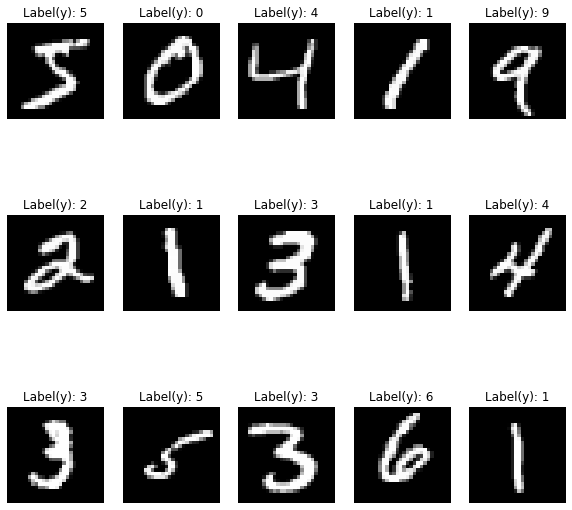

In [ ]:
fig=plt.figure(figsize=(10,10))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1)
  ax.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  ax.set_title('Label(y): {y}'.format(y=y_train[i]))
  plt.axis('off')

In [ ]:
# flatten each image into vector of length 784
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)

# Normalizing
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train=X_train[0:10000,:]
y_train=y_train[0:10000]
X_test=X_test[0:2000,:]
y_test=y_test[0:2000]

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((10000, 784), (10000,), (2000, 784), (2000,))

## Linear SVM for MNIST Multiclass Classification

### Using Pipeline

In [ ]:
pipe_1=Pipeline([
                 ('scaler',MinMaxScaler()),
                 ('classifier',SVC(kernel='linear',C=1))
])
pipe_1.fit(X_train,y_train.ravel())

# evaluation using cross validation
acc=cross_val_score(pipe_1,X_train,y_train.ravel(),cv=2)
print('Training score: ',acc.mean()*100)

Training score:  91.07000000000001


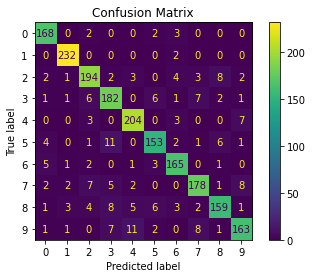

In [ ]:
# visualizing using confusion matrix
y_pred=pipe_1.predict(X_test)
cm=confusion_matrix(y_test,y_pred) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
CR=classification_report(y_test,y_pred)
print('Classification report: \n',CR)

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



## Non Linear SVM for MNIST multiclass Classification

### Using Pipeline

In [ ]:
pipe_2=Pipeline([
                 ('scaler',MinMaxScaler()),
                 ('classifier',SVC(kernel='rbf',C=1,gamma=0.1))
])
pipe_2.fit(X_train,y_train.ravel())

# evaluation using cross validation
acc=cross_val_score(pipe_2,X_train,y_train.ravel(),cv=2)
print('Training score: ',acc.mean()*100)

Training score:  82.87


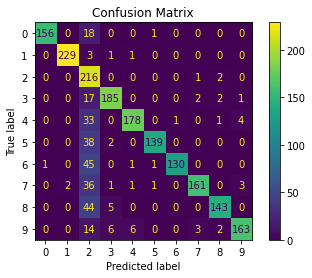

In [ ]:
# visualizing using confusion matrix
y_pred=pipe_2.predict(X_test)
cm=confusion_matrix(y_test,y_pred) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
CR=classification_report(y_test,y_pred)
print('Classification report: \n',CR)

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



### Using Grid Search CV

In [ ]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

C_range=np.logspace(-2,10,13)
gamma_range=np.logspace(-9,3,13)
param_grid=dict(gamma=gamma_range,C=C_range)
cv=StratifiedShuffleSplit(n_splits=3,test_size=.2,random_state=42)
grid=GridSearchCV(SVC(kernel='rbf'),param_grid=param_grid,cv=cv)
grid.fit(X_train,y_train.ravel())

print('The Best parameters are %s with a score of %0.2f' %(grid.best_params_,grid.best_score_))

KeyboardInterrupt: ignored

In [ ]:
# visualizing using confusion matrix
y_pred=grid.predict(X_test)
cm=confusion_matrix(y_test,y_pred) 
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

NotFittedError: ignored

In [ ]:
CR=classification_report(y_test,y_pred)
print('Classification report: \n',CR)

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



# Practice Assignment

In [ ]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True,as_frame=True)

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
xtrain

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
pipe_1=Pipeline([
                #  ('scaler',MinMaxScaler()),
                 ('classifier',SVC(C=20, kernel='rbf', gamma='auto',
                                   random_state=42))
])
pipe_1.fit(xtrain,ytrain)

# evaluation using cross validation
acc=cross_val_score(pipe_1,xtrain,ytrain)
print('Training score: ',acc.mean()*100)

Training score:  95.23809523809523


In [ ]:
from sklearn.datasets import load_iris
X,y=load_iris(as_frame=True,return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

kernels = ['linear','rbf']
C = [1,15,25]
gamma =['auto']
cv= 4
param_grid=dict(gamma=gamma,C=C)

grid=GridSearchCV(SVC(kernel=kernels,random_state=0),param_grid=param_grid,cv=cv)
grid.fit(X_train,y_train)

print('The Best parameters are %s with a score of %0.2f' %(grid.best_params_,grid.best_score_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

ValueError: ignored

In [5]:
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True,as_frame=True)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42 )

In [6]:
model=SVC(gamma='auto',kernel='poly',C=10)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

1.0

In [7]:
model=SVC(gamma='auto',kernel='sigmoid',C=25)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.28888888888888886

In [58]:
X,y=load_iris(as_frame=True,return_X_y=True)

In [59]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [60]:
y=pd.DataFrame(y)

In [61]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [62]:
indx=np.where(y['target']==0)

In [63]:
indx=np.array(indx)
indx

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49]])

In [55]:
indx=indx.reshape(-1,1)
indx.shape

(50, 1)

In [68]:
x=X.drop([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49], axis=0, inplace=False)

In [69]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [70]:
y_n=y.drop([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49], axis=0, inplace=False)

In [71]:
y_n

,target
50,1
51,1
52,1
53,1
54,1
...,...
145,2
146,2
147,2
148,2


In [74]:
np.unique(y_n)

array([1, 2])

In [75]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y_n,test_size=0.25,random_state=0)

In [76]:
xtrain.shape

(75, 4)

In [77]:
pipe=Pipeline([
               ('scaler',MinMaxScaler()),
               ('svc',SVC())
])
pipe.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [78]:
from sklearn.metrics import precision_score
y_pred=pipe.predict(xtest)
precision_score(ytest, y_pred)

1.0

In [79]:
data=load_iris()

In [80]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
samp=pd.read_csv('/content/submission.csv')

In [4]:
samp

,id,label
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
1623,1623,0
1624,1624,1
1625,1625,0
1626,1626,1


In [ ]:
fo